**Objective**: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

# Task 1: Data Loading and Exploration
1. Load the Heart Disease UCI dataset.
2. Explore the dataset to understand its structure and features.
3. Split the data into training and testing sets.

In [3]:
# insert code here
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [5]:
import pandas as pd

# Supponendo che 'data_url' sia la variabile che contiene l'URL del file CSV
url = 'https://archive.ics.uci.edu/static/public/45/data.csv'
df = pd.read_csv(url)

# Visualizza le prime righe per confermare il caricamento
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [6]:
from sklearn.model_selection import train_test_split
# Supponendo che 'num' sia il nome della colonna target
X = df.drop('num', axis=1)  # Features
y = df['num']               # Target
# Suddividi in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verifica le dimensioni dei set risultanti
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (242, 13)
Test set size: (61, 13)


# Task 2: Data Preprocessing
1. Handle missing values if any.
2. Encode categorical variables using appropriate methods.
3. Standardize or normalize numerical features if necessary.

In [7]:
# insert code here
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [8]:
# Per riempire con la media
df.fillna(df.mean(), inplace=True)

In [9]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler
# Separa le features e il target
X = df.drop('num', axis=1)  # Features
y = df['num']               # Target

# Seleziona solo le colonne numeriche per la standardizzazione
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

#########################################################
# BARDH'S Comments
# Here you're treating all the features as continous ones.
# In the UCI webpage corresponding to this dataset you have
# information about which features are categorical as well.
# By treating all features as continuous, you've introduces a
# mathematical lattice on the categorial features. This isn't
# a desirable characteristic in this scenario.
#########################################################

# Inizializza lo StandardScaler
scaler = StandardScaler()

# Standardizza solo le colonne numeriche
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Ricombina X e y in un nuovo DataFrame, se necessario
df_scaled = pd.concat([X, y], axis=1)

In [11]:
print(df_scaled.head())

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal  num  
0  0.017197 -0.696631  1.087338  2.274579 -0.723095  0.655818    0  
1 -1.821905  1.435481  0.397182  0.649113  2.503851 -0.898522    2  
2 -0.902354  1.435481  1.346147  0.649113  1.428203  1.173931    1  
3  1.637359 -0.696631  2.122573  2.274579 -0.723095 -0.898522    0  
4  0.980537 -0.696631  0.310912 -0.976352 -0.723095 -0.898522    0  


# Task 3: Initial XGBoost Model
1. Build an initial XGBoost model using default hyperparameters.
2. Train the model on the training set and evaluate its performance on the testing set.
3. Note down the accuracy and any other relevant metrics.

In [12]:
# insert code here
!pip install xgboost
from xgboost import XGBClassifier
model = XGBClassifier()

In [13]:
from sklearn.model_selection import train_test_split

# Assicurati che 'target' sia il nome della tua colonna obiettivo
X = df_scaled.drop('num', axis=1)
y = df_scaled['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [15]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.47540983606557374


# Task 4: Hyperparameter Tuning
1. Experiment with hyperparameter tuning to improve model performance.
2. Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
3. Use techniques like cross-validation to find optimal hyperparameters.
4. Train and evaluate the model with the tuned hyperparameters.

In [16]:
# insert code here
from sklearn.model_selection import GridSearchCV

# Definisci un dizionario degli iperparametri da testare
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Crea il modello XGBoost
xgb_model = XGBClassifier()

# Crea l'oggetto GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Addestra il modello
grid_search.fit(X_train, y_train)

# Stampa i migliori parametri
print("Migliori parametri:", grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Migliori parametri: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Crea un nuovo modello XGBoost con i migliori parametri
best_xgb_model = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)

# Addestra il modello sul set di addestramento
best_xgb_model.fit(X_train, y_train)

# Effettua previsioni sul set di test
y_pred = best_xgb_model.predict(X_test)

# Calcola l'accuratezza del modello
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.5081967213114754

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score

# Define the hyperparameters grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

# Create a cross-validation strategy (Stratified K-Fold)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create a custom scoring function (accuracy)
scoring = make_scorer(accuracy_score)

# Create the XGBoost model
xgb_model = XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=scoring, cv=cv, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

best_params, accuracy


Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.0

({'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200},
 0.5245901639344263)

In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Crea un nuovo modello XGBoost con gli iperparametri ottimizzati
tuned_xgb_model = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=200)

# Addestra il modello sul set di addestramento
tuned_xgb_model.fit(X_train, y_train)

# Effettua previsioni sul set di test
y_pred = tuned_xgb_model.predict(X_test)

# Calcola l'accuratezza del modello con gli iperparametri ottimizzati
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.5245901639344263

# Task 5: Feature Importance
1. Explore feature importance using the **feature_importances_** attribute of the trained XGBoost model.
2. Identify the most important features for heart disease prediction.

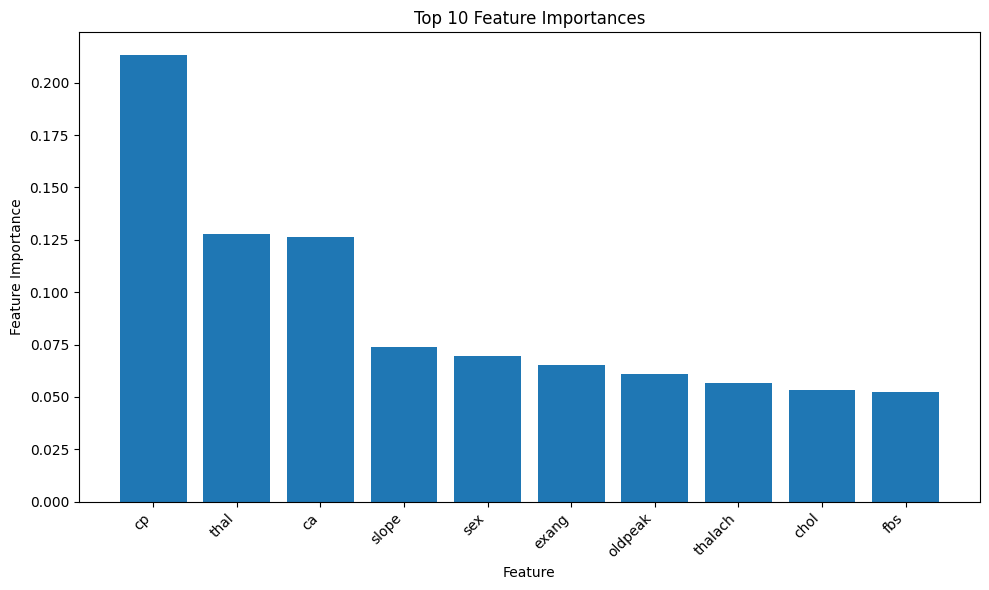

In [20]:
# insert code here
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importance = tuned_xgb_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort features by importance in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Plot the top N feature importances
top_n = 10  # You can adjust this to show the top N features
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importance[sorted_idx][:top_n], align="center")
plt.xticks(range(top_n), feature_names[sorted_idx][:top_n], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Top {} Feature Importances".format(top_n))
plt.tight_layout()
plt.show()


In [21]:
# Get feature importances from the trained model
feature_importance = tuned_xgb_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame to store feature importances with corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
top_n = 10  # You can adjust this to show the top N features
top_features = feature_importance_df.head(top_n)
print(top_features)


    Feature  Importance
2        cp    0.213409
12     thal    0.128003
11       ca    0.126202
10    slope    0.073833
1       sex    0.069405
8     exang    0.065163
9   oldpeak    0.060877
7   thalach    0.056837
4      chol    0.053277
5       fbs    0.052227


# Task 6: Model Evaluation
1. Compare the performance metrics of the initial model and the tuned model.
2. Visualize the improvement achieved in a clear and concise manner.
3. Discuss the impact of hyperparameter tuning and feature importance on model performance.

In [34]:
# insert code here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initial XGBoost model
initial_xgb_model = XGBClassifier()  # Using default hyperparameters
initial_xgb_model.fit(X_train, y_train)
y_pred_initial = initial_xgb_model.predict(X_test)

# Calculate performance metrics for the initial model
accuracy_initial = accuracy_score(y_test, y_pred_initial)
precision_initial = precision_score(y_test, y_pred_initial,average='weighted')
recall_initial = recall_score(y_test, y_pred_initial,average='weighted')
f1_score_initial = f1_score(y_test, y_pred_initial,average='weighted')

# Calculate performance metrics for the tuned model
y_pred_tuned = tuned_xgb_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned,average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned,average='weighted')
f1_score_tuned = f1_score(y_test, y_pred_tuned,average='weighted')

# Print and compare the metrics
print("Initial Model:")
print("Accuracy:", accuracy_initial)
print("Precision:", precision_initial)
print("Recall:", recall_initial)
print("F1 Score:", f1_score_initial)
print("\nTuned Model:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1 Score:", f1_score_tuned)


Initial Model:
Accuracy: 0.47540983606557374
Precision: 0.4074011571841851
Recall: 0.47540983606557374
F1 Score: 0.4387635756056809

Tuned Model:
Accuracy: 0.5245901639344263
Precision: 0.42877480586712685
Recall: 0.5245901639344263
F1 Score: 0.462339479724513


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


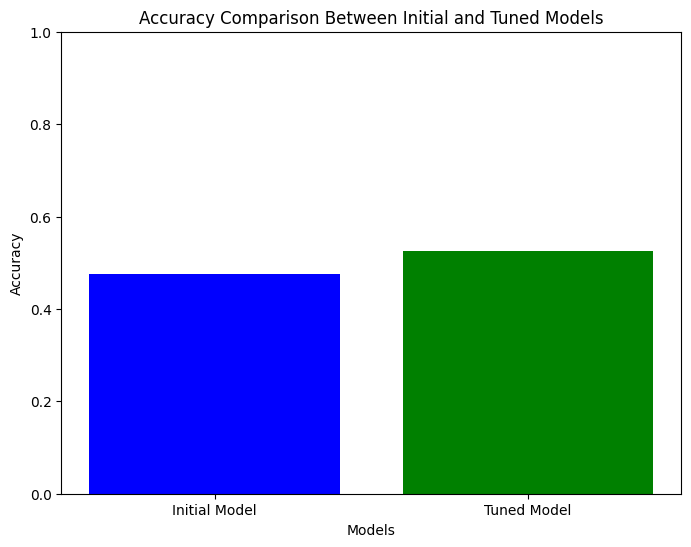

In [35]:
import matplotlib.pyplot as plt

# Define model names and their corresponding accuracy scores
model_names = ["Initial Model", "Tuned Model"]
accuracy_scores = [accuracy_initial, accuracy_tuned]

# Create a bar chart to visualize the accuracy improvement
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green'])
plt.ylim(0.0, 1.0)  # Set the y-axis limits between 0 and 1
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison Between Initial and Tuned Models")
plt.show()
